In [1]:
cd /content/drive/MyDrive/unity

/content/drive/MyDrive/unity


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# 1. 데이터 불러오기
data = pd.read_csv('풍력발전량_통계분석_데이터.csv')  # 파일 경로 확인 후 적용

data.head()

,year,month,day,hour,WS_obs,power_obs,WS_WRF,power_WRF,WS_OML_68,power_OML,WS,WS_2
0,2012,12,1,0,9.40,3525.01,8.2240,2508.97,9.6780,4114.19,1.5,1.866959
1,2012,12,1,1,9.74,4114.19,8.6580,2981.39,8.6841,2981.39,1.8,1.391419
2,2012,12,1,2,10.68,5379.02,8.3665,2508.97,10.1350,4727.44,1.8,1.686222
3,2012,12,1,3,13.01,5563.73,12.6350,5563.73,11.6540,5563.73,1.6,1.782244
4,2012,12,1,4,13.76,5563.73,10.0000,4727.44,11.5680,5563.73,1.6,1.764342


In [ ]:
#OBS : 실제 데이터, WRF, OML : 프로그램 돌린 결과

In [ ]:
data.shape

(8760, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       8760 non-null   int64  
 1   month      8760 non-null   int64  
 2   day        8760 non-null   int64  
 3   hour       8760 non-null   int64  
 4   WS_obs     8760 non-null   float64
 5   power_obs  8760 non-null   float64
 6   WS_WRF     8760 non-null   float64
 7   power_WRF  8760 non-null   float64
 8   WS_OML_68  8760 non-null   float64
 9   power_OML  8760 non-null   float64
 10  WS         8760 non-null   float64
 11  WS_2       8760 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 821.4 KB


In [ ]:
data.head()

,year,month,day,hour,WS_obs,power_obs,WS_WRF,power_WRF,WS_OML_68,power_OML,WS,WS_2
0,2012,12,1,0,9.40,3525.01,8.2240,2508.97,9.6780,4114.19,1.5,1.866959
1,2012,12,1,1,9.74,4114.19,8.6580,2981.39,8.6841,2981.39,1.8,1.391419
2,2012,12,1,2,10.68,5379.02,8.3665,2508.97,10.1350,4727.44,1.8,1.686222
3,2012,12,1,3,13.01,5563.73,12.6350,5563.73,11.6540,5563.73,1.6,1.782244
4,2012,12,1,4,13.76,5563.73,10.0000,4727.44,11.5680,5563.73,1.6,1.764342


In [ ]:
data.describe()

,year,month,day,hour,WS_obs,power_obs,WS_WRF,power_WRF,WS_OML_68,power_OML,WS,WS_2
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2012.915068,6.526027,15.720548,11.500000,8.234040,2623.433033,7.660320,2340.923700,8.395631,2621.225647,2.055970,1.409651
std,0.278796,3.448048,8.796749,6.922582,4.696235,2280.725969,3.836077,2077.924477,4.503941,2227.384333,1.451776,0.384102
min,2012.000000,1.000000,1.000000,0.000000,0.307000,0.000000,0.425850,0.000000,0.402150,0.000000,-1.000000,0.000000
25%,2013.000000,4.000000,8.000000,5.750000,4.361750,278.590000,4.654237,430.530000,4.881325,430.530000,1.100000,1.135158
50%,2013.000000,7.000000,16.000000,11.500000,7.715500,2079.880000,7.266950,1698.000000,7.649150,2079.880000,1.800000,1.413739
75%,2013.000000,10.000000,23.000000,17.250000,11.370000,5563.730000,9.945000,4114.190000,11.264812,5563.730000,2.900000,1.692983
max,2013.000000,12.000000,31.000000,23.000000,28.740000,5563.730000,22.417000,5563.730000,33.088000,5563.730000,18.799999,2.447490


In [ ]:
data.isnull().sum()

,0
year,0
month,0
day,0
hour,0
WS_obs,0
power_obs,0
WS_WRF,0
power_WRF,0
WS_OML_68,0
power_OML,0


In [ ]:
# 'year', 'month', 'day', 'hour' 열을 합쳐 'date' 열 생성
data['date'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

data.head()

,year,month,day,hour,WS_obs,power_obs,WS_WRF,power_WRF,WS_OML_68,power_OML,WS,WS_2,date
0,2012,12,1,0,9.40,3525.01,8.2240,2508.97,9.6780,4114.19,1.5,1.866959,2012-12-01 00:00:00
1,2012,12,1,1,9.74,4114.19,8.6580,2981.39,8.6841,2981.39,1.8,1.391419,2012-12-01 01:00:00
2,2012,12,1,2,10.68,5379.02,8.3665,2508.97,10.1350,4727.44,1.8,1.686222,2012-12-01 02:00:00
3,2012,12,1,3,13.01,5563.73,12.6350,5563.73,11.6540,5563.73,1.6,1.782244,2012-12-01 03:00:00
4,2012,12,1,4,13.76,5563.73,10.0000,4727.44,11.5680,5563.73,1.6,1.764342,2012-12-01 04:00:00


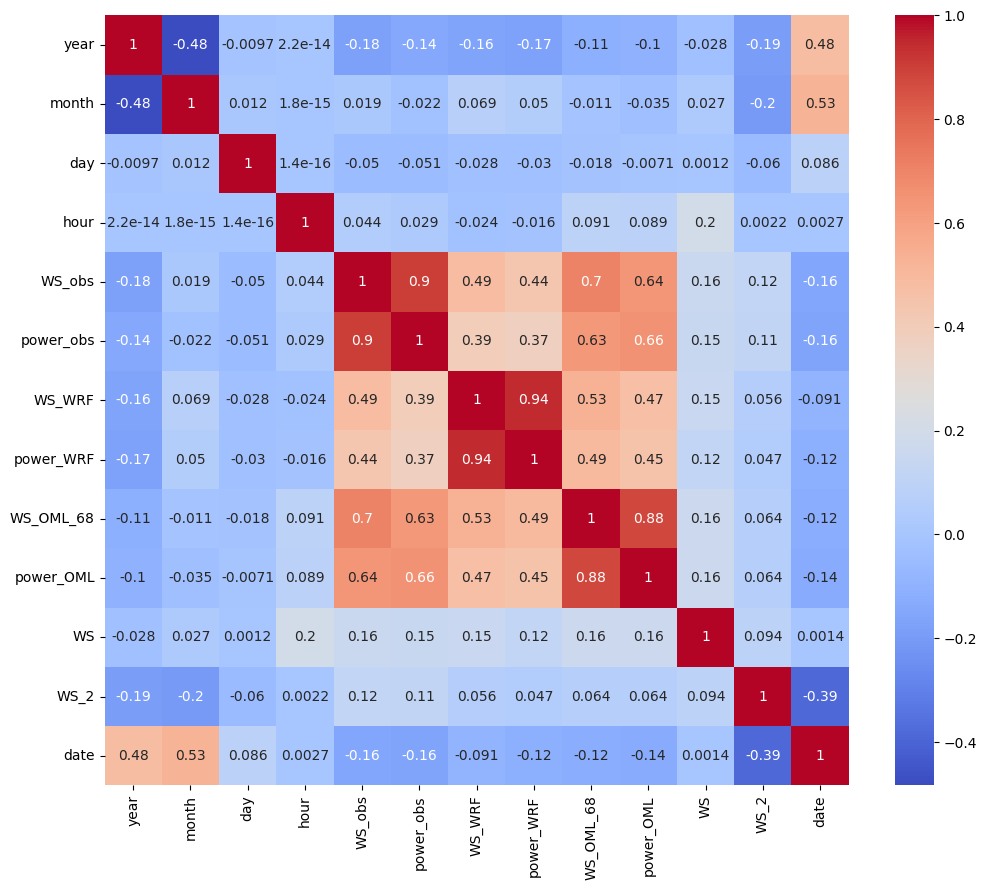

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히트맵 크기 조정
plt.figure(figsize=(12, 10))  # width와 height 값을 조정하여 크기 변경
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


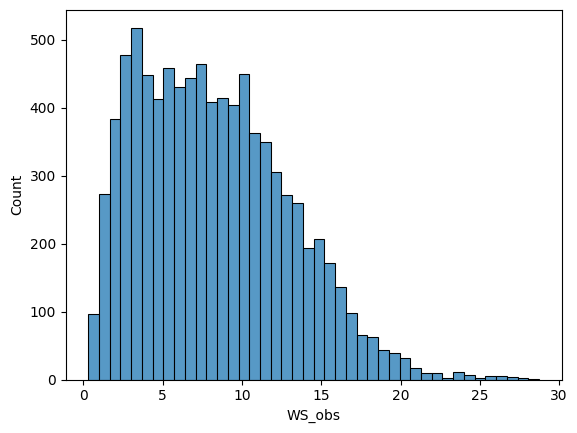

In [ ]:
sns.histplot(data['WS_obs'])
plt.show()

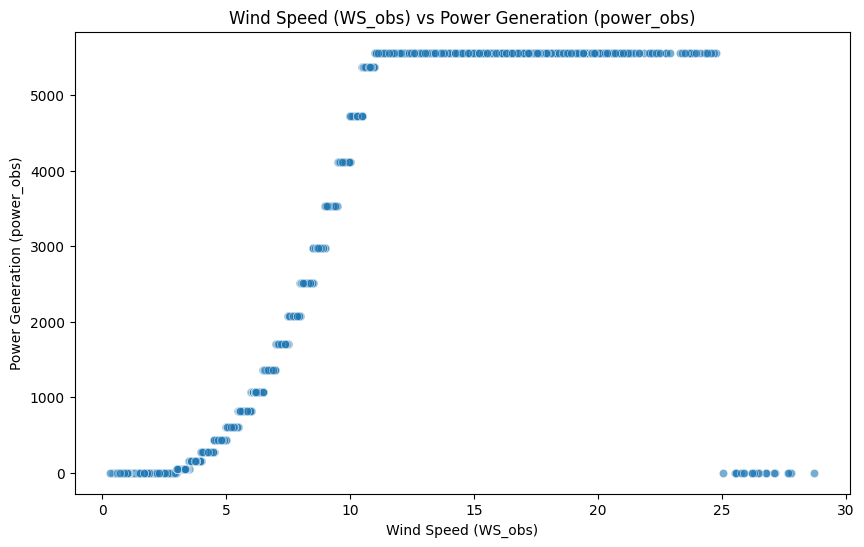

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WS_obs', y='power_obs', data=data, alpha=0.6)
plt.title('Wind Speed (WS_obs) vs Power Generation (power_obs)')
plt.xlabel('Wind Speed (WS_obs)')
plt.ylabel('Power Generation (power_obs)')
plt.show()


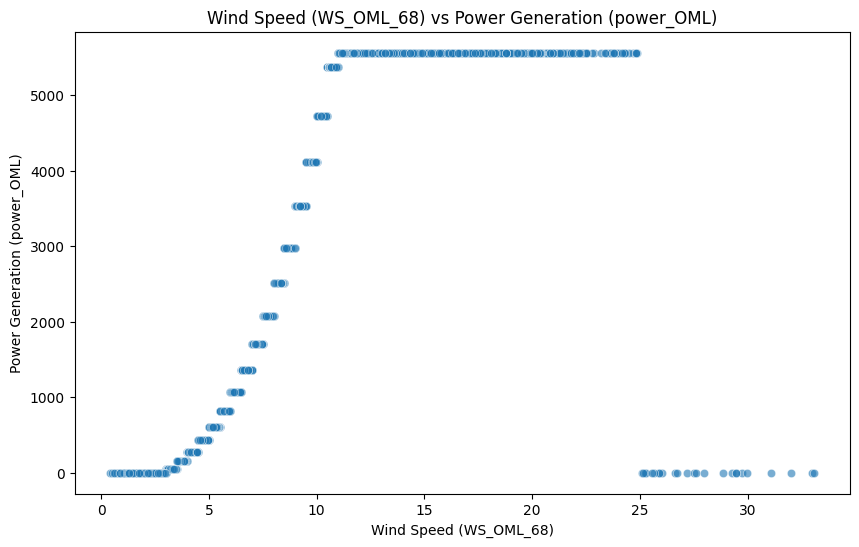

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WS_OML_68', y='power_OML', data=data, alpha=0.6)
plt.title('Wind Speed (WS_OML_68) vs Power Generation (power_OML)')
plt.xlabel('Wind Speed (WS_OML_68)')
plt.ylabel('Power Generation (power_OML)')
plt.show()


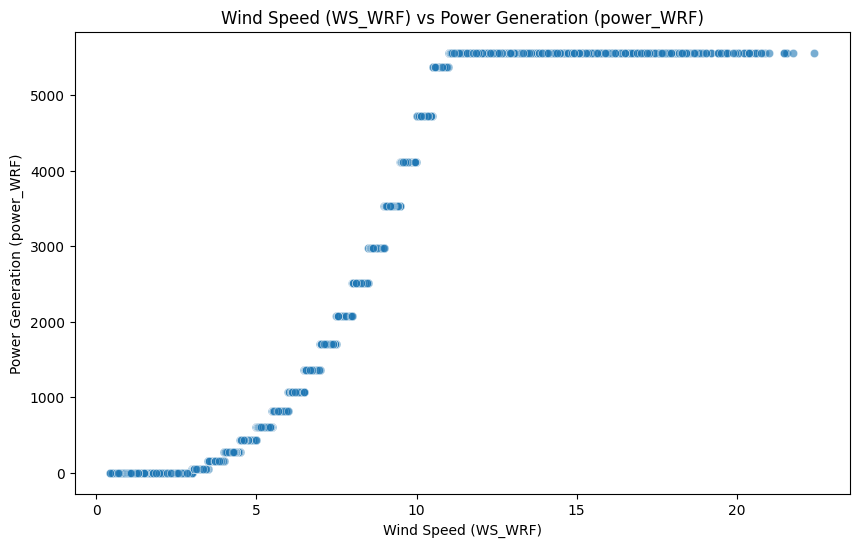

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WS_WRF', y='power_WRF', data=data, alpha=0.6)
plt.title('Wind Speed (WS_WRF) vs Power Generation (power_WRF)')
plt.xlabel('Wind Speed (WS_WRF)')
plt.ylabel('Power Generation (power_WRF)')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. 데이터 전처리
# 예시: 결측치 처리, 필요 없는 열 삭제 등
data = data.dropna()  # 결측치 삭제

# 예시로 'target'이 예측 대상이고 나머지 열이 특성이라고 가정
X = data.drop(columns=['power_obs'])  # 'target'은 예측할 열 이름으로 대체
y = data['power_obs']

# 3. 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 모델 리스트 정의
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# 5. 모델 학습 및 평가
results = []
for name, model in models.items():
    # 모델 학습
    model.fit(X_train, y_train)

    # 예측
    y_pred = model.predict(X_test)

    # 평가
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse, r2])

# 결과 출력
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'R2'])
print(results_df)


               Model            MSE        R2
0  Linear Regression  802340.478410  0.848161
1      Random Forest      31.188217  0.999994
2            XGBoost   20989.057288  0.996028


   year  month  day  hour  WS_obs  power_obs   WS_WRF  power_WRF  WS_OML_68  \
0  2012     12    1     0    9.40    3525.01   8.2240    2508.97     9.6780   
1  2012     12    1     1    9.74    4114.19   8.6580    2981.39     8.6841   
2  2012     12    1     2   10.68    5379.02   8.3665    2508.97    10.1350   
3  2012     12    1     3   13.01    5563.73  12.6350    5563.73    11.6540   
4  2012     12    1     4   13.76    5563.73  10.0000    4727.44    11.5680   

   power_OML   WS      WS_2  orange  green  red  
0    4114.19  1.5  1.866959       1      0    0  
1    2981.39  1.8  1.391419       1      0    0  
2    4727.44  1.8  1.686222       1      0    0  
3    5563.73  1.6  1.782244       0      1    0  
4    5563.73  1.6  1.764342       0      1    0  
Accuracy: 1.0
   WS_obs  power_obs  orange  green  red
0    9.40    3525.01       1      0    0
1    9.74    4114.19       1      0    0
2   10.68    5379.02       1      0    0
3   13.01    5563.73       0      1    0
4   13

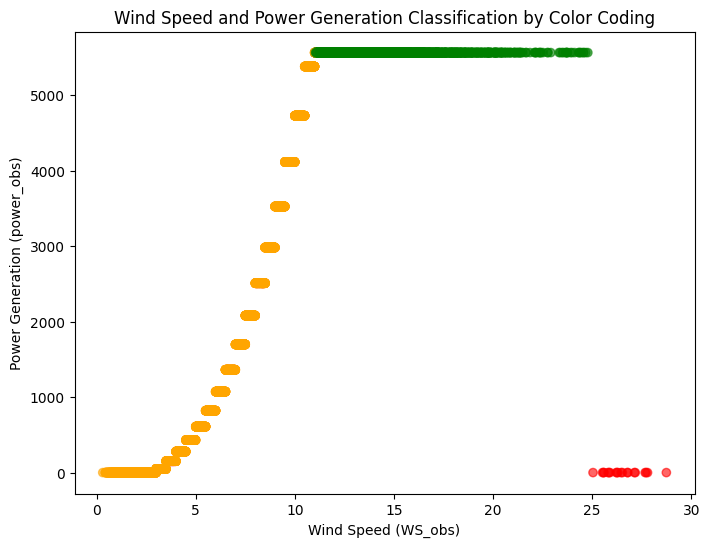

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('풍력발전량_통계분석_데이터.csv')

# 0~11: orange=1, green=0, red=0
# 11~25: orange=0, green=1, red=0
# 25 초과: orange=0, green=0, red=1
data['orange'] = np.where((data['WS_obs'] <= 11), 1, 0)
data['green'] = np.where((data['WS_obs'] > 11) & (data['WS_obs'] <= 25), 1, 0)
data['red'] = np.where(data['WS_obs'] > 25, 1, 0)

print(data.head())

# 특성과 타겟 변수 분리
X = data[['WS_obs']]
y = data[['orange', 'green', 'red']]  # 구간화된 색상 클래스

# 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 분류 모델 학습 (멀티클래스 분류를 위한 RandomForest 사용)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# 예측 및 평가
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 데이터프레임 및 열 확인
print(data[['WS_obs', 'power_obs' ,'orange', 'green', 'red']].head())

# 시각화
plt.figure(figsize=(8, 6))
colors = np.where(data['WS_obs'] <= 11, 'orange', np.where(data['WS_obs'] <= 25, 'green', 'red'))
plt.scatter(data['WS_obs'], data['power_obs'], c=colors, alpha=0.6)
plt.xlabel('Wind Speed (WS_obs)')
plt.ylabel('Power Generation (power_obs)')
plt.title('Wind Speed and Power Generation Classification by Color Coding')
plt.show()


Accuracy on Dummy Test Data: 0.98
      WS_obs   power_obs  orange  green  red
0  11.236204  5563.73000       0      1    0
1  28.521429     0.00000       0      0    1
2  21.959818  5563.73000       0      1    0
3  17.959755  5563.73000       0      1    0
4   4.680559  3261.99404       1      0    0


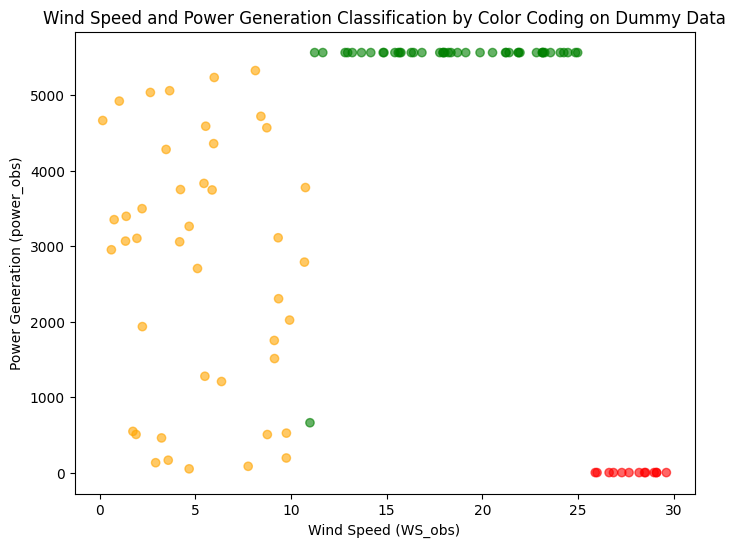

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 기존 CSV 데이터 불러오기
data = pd.read_csv('풍력발전량_통계분석_데이터.csv')

# 풍속 구간에 따른 발전량 설정 (기존 CSV 데이터)
data['power_obs'] = np.where((data['WS_obs'] <= 10.99), np.random.uniform(0, 5379.02, len(data)),
                    np.where((data['WS_obs'] >= 11) & (data['WS_obs'] <= 24.99), 5563.73,
                    np.where(data['WS_obs'] >= 25, 0, data['power_obs'])))

# 0~10.99: orange=1, green=0, red=0
# 11~24.99: orange=0, green=1, red=0
# 25 이상: orange=0, green=0, red=1
data['orange'] = np.where((data['WS_obs'] <= 10.99), 1, 0)
data['green'] = np.where((data['WS_obs'] >= 11) & (data['WS_obs'] <= 24.99), 1, 0)
data['red'] = np.where(data['WS_obs'] >= 25, 1, 0)

# 더미 데이터 생성 (테스트용)
np.random.seed(42)
test_data = pd.DataFrame({
    'WS_obs': np.random.uniform(0, 30, 100),  # 풍속
    'power_obs': np.random.uniform(0, 6000, 100)  # 발전량
})

# 더미 데이터에 발전량 설정
test_data['power_obs'] = np.where((test_data['WS_obs'] <= 10.99), np.random.uniform(0, 5379.02, len(test_data)),
                         np.where((test_data['WS_obs'] >= 11) & (test_data['WS_obs'] <= 24.99), 5563.73,
                         np.where(test_data['WS_obs'] >= 25, 0, test_data['power_obs'])))

# 더미 데이터에 구간에 따른 orange, green, red 열 추가
test_data['orange'] = np.where((test_data['WS_obs'] <= 10.99), 1, 0)
test_data['green'] = np.where((test_data['WS_obs'] >= 11) & (test_data['WS_obs'] <= 24.99), 1, 0)
test_data['red'] = np.where(test_data['WS_obs'] >= 25, 1, 0)

# 학습 및 타겟 변수 분리
X_train = data[['WS_obs']]
y_train = data[['orange', 'green', 'red']]
X_test = test_data[['WS_obs']]
y_test = test_data[['orange', 'green', 'red']]

# 분류 모델 학습 (랜덤 포레스트 사용)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# 예측 및 평가
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Dummy Test Data:", accuracy)

# 데이터프레임 및 열 확인
print(test_data[['WS_obs', 'power_obs', 'orange', 'green', 'red']].head())

# 시각화
plt.figure(figsize=(8, 6))
colors = np.where(test_data['WS_obs'] <= 10.99, 'orange', np.where(test_data['WS_obs'] <= 24.99, 'green', 'red'))
plt.scatter(test_data['WS_obs'], test_data['power_obs'], c=colors, alpha=0.6)
plt.xlabel('Wind Speed (WS_obs)')
plt.ylabel('Power Generation (power_obs)')
plt.title('Wind Speed and Power Generation Classification by Color Coding on Dummy Data')
plt.show()


Accuracy on Test Data: 1.0
Empty DataFrame
Columns: [WS_obs, power_obs, error]
Index: []
      WS_obs    power_obs  orange  green  red    error
6056   1.940  2907.643652       1      0    0  Correct
5556  11.710  5563.730000       0      1    0  Correct
5990   5.000   768.046795       1      0    0  Correct
7674   4.378  2776.907366       1      0    0  Correct
3319   8.620   941.990873       1      0    0  Correct


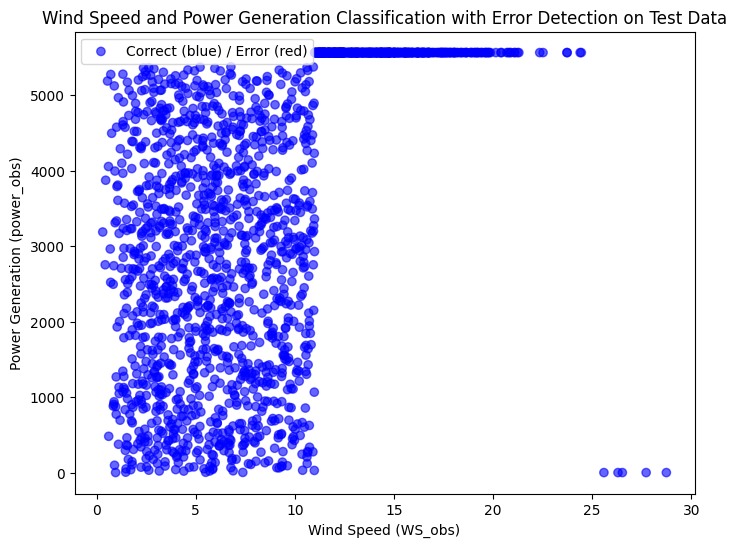

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 기존 CSV 데이터 불러오기
data = pd.read_csv('풍력발전량_통계분석_데이터.csv')

# 풍속 구간에 따른 발전량 설정 (구간에 맞는 값 생성)
data['power_obs'] = np.where((data['WS_obs'] <= 10.99), np.random.uniform(0, 5379.02, len(data)),
                    np.where((data['WS_obs'] >= 11) & (data['WS_obs'] <= 24.99), 5563.73,
                    np.where(data['WS_obs'] >= 25, 0, data['power_obs'])))

# 각 구간에 따른 orange, green, red 열 생성
data['orange'] = np.where((data['WS_obs'] <= 10.99), 1, 0)
data['green'] = np.where((data['WS_obs'] >= 11) & (data['WS_obs'] <= 24.99), 1, 0)
data['red'] = np.where(data['WS_obs'] >= 25, 1, 0)

# 8:2 비율로 데이터 분할
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# 학습 데이터와 테스트 데이터의 특성(X)과 타겟(y) 분리
X_train = train_data[['WS_obs']]
y_train = train_data[['orange', 'green', 'red']]
X_test = test_data[['WS_obs']]
y_test = test_data[['orange', 'green', 'red']]

# 분류 모델 학습 (랜덤 포레스트 사용)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Data:", accuracy)

# 테스트 데이터에 오류 검출 열 추가: 발전량이 구간에 맞지 않는 경우 'Error'로 표시
test_data['error'] = np.where(
    ((test_data['WS_obs'] <= 10.99) & (test_data['power_obs'] > 5379.02)) |
    ((test_data['WS_obs'] >= 11) & (test_data['WS_obs'] <= 24.99) & (test_data['power_obs'] != 5563.73)) |
    ((test_data['WS_obs'] >= 25) & (test_data['power_obs'] != 0)),
    'Error', 'Correct'
)

# 오류가 있는 데이터 확인
print(test_data[test_data['error'] == 'Error'][['WS_obs', 'power_obs', 'error']])

# 데이터프레임 및 열 확인
print(test_data[['WS_obs', 'power_obs', 'orange', 'green', 'red', 'error']].head())

# 시각화
plt.figure(figsize=(8, 6))
colors = np.where(test_data['error'] == 'Error', 'red', 'blue')
plt.scatter(test_data['WS_obs'], test_data['power_obs'], c=colors, alpha=0.6, label="Correct (blue) / Error (red)")
plt.xlabel('Wind Speed (WS_obs)')
plt.ylabel('Power Generation (power_obs)')
plt.title('Wind Speed and Power Generation Classification with Error Detection on Test Data')
plt.legend()
plt.show()
